**
Importing libraries¶
**

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from datetime import datetime, date
from dateutil.relativedelta import relativedelta

from sklearn.preprocessing import StandardScaler

from math import ceil

from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix


from tensorflow.python.keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split


from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
%matplotlib inline

# Any results you write to the current directory are saved as output.

In [4]:

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


**1. Starting with Kaggle - importing data**

In [5]:
sample_submission = pd.read_csv("../input/digit-recognizer/sample_submission.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")
train = pd.read_csv("../input/digit-recognizer/train.csv")
print("Provided training dataset is of size:{}\n Test dataset is of size:{}".format(train.shape,test.shape))

Provided training dataset is of size:(42000, 785)
 Test dataset is of size:(28000, 784)


In [6]:
#Convert train and test into images/labels
x_train = train.drop(['label'],axis=1).values.astype('float32') #all pixel values
y_train = train['label'].values.astype('float32') #all target digits

# print("Min_orig: {}\nMax_orig: {}".format(x_train.min(), x_train.max()))
# x_train = x_train/x_train.max() #scale inputs to range between 0 and 1
# print("Min_orig: {}\nMax_orig: {}".format(x_train.min(), x_train.max()))

x_test = test.values.astype('float32')
x_train = x_train.reshape(x_train.shape[0], 28, 28)/255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28)/255.0



#splitting into train and val
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

print("Shape of training data sets:{}".format(x_train.shape))
print("Shape of validation data sets:{}".format(x_val.shape))

Shape of training data sets:(33600, 28, 28)
Shape of validation data sets:(8400, 28, 28)


In [7]:
#One hot encoding
print("Original shape of x_val: {}".format(y_train.shape))
y_train_ohe = to_categorical(y_train)
print("Shape after one hot encoding: {}".format(y_train_ohe.shape))
print("Original shape of y_val: {}".format(y_val.shape))
y_val_ohe = to_categorical(y_val)
print("Shape after one hot encoding: {}".format(y_val_ohe.shape))

Original shape of x_val: (33600,)
Shape after one hot encoding: (33600, 10)
Original shape of y_val: (8400,)
Shape after one hot encoding: (8400, 10)


**Visualize some examples fromt the dataset**


Adding dimensions for keras¶
a 2D-Conv layer expects an input of shape

#examples
#pix row
#pix column
#channels


In [9]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)  
x_val = x_val.reshape(x_val.shape[0], 28, 28,1)  
x_test = x_test.reshape(x_test.shape[0], 28, 28,1) 
print("Train size:{}\nvalidation size:{}\nTest size:{}".format(x_train.shape,x_val.shape, x_test.shape))

Train size:(33600, 28, 28, 1)
validation size:(8400, 28, 28, 1)
Test size:(28000, 28, 28, 1)


**Defining the architecture**

In [10]:
#build model
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(5,5),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(10,activation='softmax'))
          
#compile model
          
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
          
#print model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2360320   
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [11]:
#Training
x_train.shape,y_train_ohe.shape,x_val.shape,y_val_ohe.shape
history = model.fit(x_train,y_train_ohe,batch_size=64,epochs=60,verbose=1,validation_data=(x_val,y_val_ohe))

Train on 33600 samples, validate on 8400 samples
Epoch 1/15
33600/33600 [==============================] - 42s 1ms/step - loss: 0.1459 - accuracy: 0.9537 - val_loss: 0.0456 - val_accuracy: 0.9857
Epoch 2/15
33600/33600 [==============================] - 43s 1ms/step - loss: 0.0453 - accuracy: 0.9857 - val_loss: 0.0432 - val_accuracy: 0.9855
Epoch 3/15
33600/33600 [==============================] - 41s 1ms/step - loss: 0.0291 - accuracy: 0.9905 - val_loss: 0.0319 - val_accuracy: 0.9896
Epoch 4/15
33600/33600 [==============================] - 42s 1ms/step - loss: 0.0191 - accuracy: 0.9943 - val_loss: 0.0432 - val_accuracy: 0.9870
Epoch 5/15
33600/33600 [==============================] - 42s 1ms/step - loss: 0.0173 - accuracy: 0.9946 - val_loss: 0.0448 - val_accuracy: 0.9862
Epoch 6/15
33600/33600 [==============================] - 42s 1ms/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 0.0391 - val_accuracy: 0.9883
Epoch 7/15
33600/33600 [==============================] - 41s 1ms/ste

In [25]:
#saving model
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


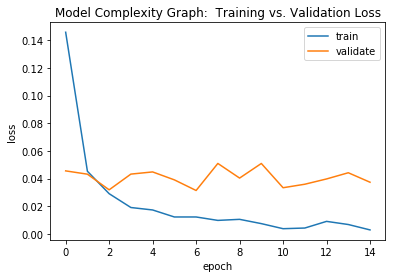

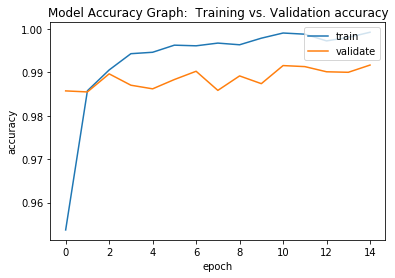

In [41]:
plt.figure(1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')

plt.figure(2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy Graph:  Training vs. Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()

ModuleNotFoundError: No module named 'helper_functions_CNN'